In [217]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib


# Seoul bike sharing demand prediction


### Import packeges 

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load Data

In [219]:
data_path = r"G:\python_all\Machine_learning_P1\001 RG Seoul-Bike-Sharing-Demand-Prediction\data\SeoulBikeData.csv"
df = pd.read_csv(data_path, encoding="unicode_escape")
df.shape

(8760, 14)

In [220]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [221]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Data information

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [223]:
df.describe(include="all").T

count unique         top  freq         mean  \
Date                         8760    365  30/11/2018    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

### Check Null Value

In [224]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [225]:
df["Date"] = pd.to_datetime(df["Date"],format='mixed')

df["weekday"] = df["Date"].dt.day_name()
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
#df["Seasons"] = pd.to_numeric(df["Seasons"],errors='coerce')


df.drop("Date", axis=1, inplace=True)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  weekday                    8760 non-null   objec

In [227]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day   weekday  \
0           0.0            0.0  Winter  No Holiday             Yes  Thursday   
1           0.0            0.0  Winter  No Holiday             Yes  Thursday   
2           0.0            0.0  Winter  No Holiday             Yes  Thursday   
3           0.0            0.0  Winter  No Holiday             Yes  Thursday   
4           0.0            0.0  Winter  No Holiday             Yes  Thursday   

   Day  Month  Year  
0   12      1  2017  
1   12      1  2017  
2   12      1  2017  
3   12      1  2017  
4   12      1  2017

## EDA

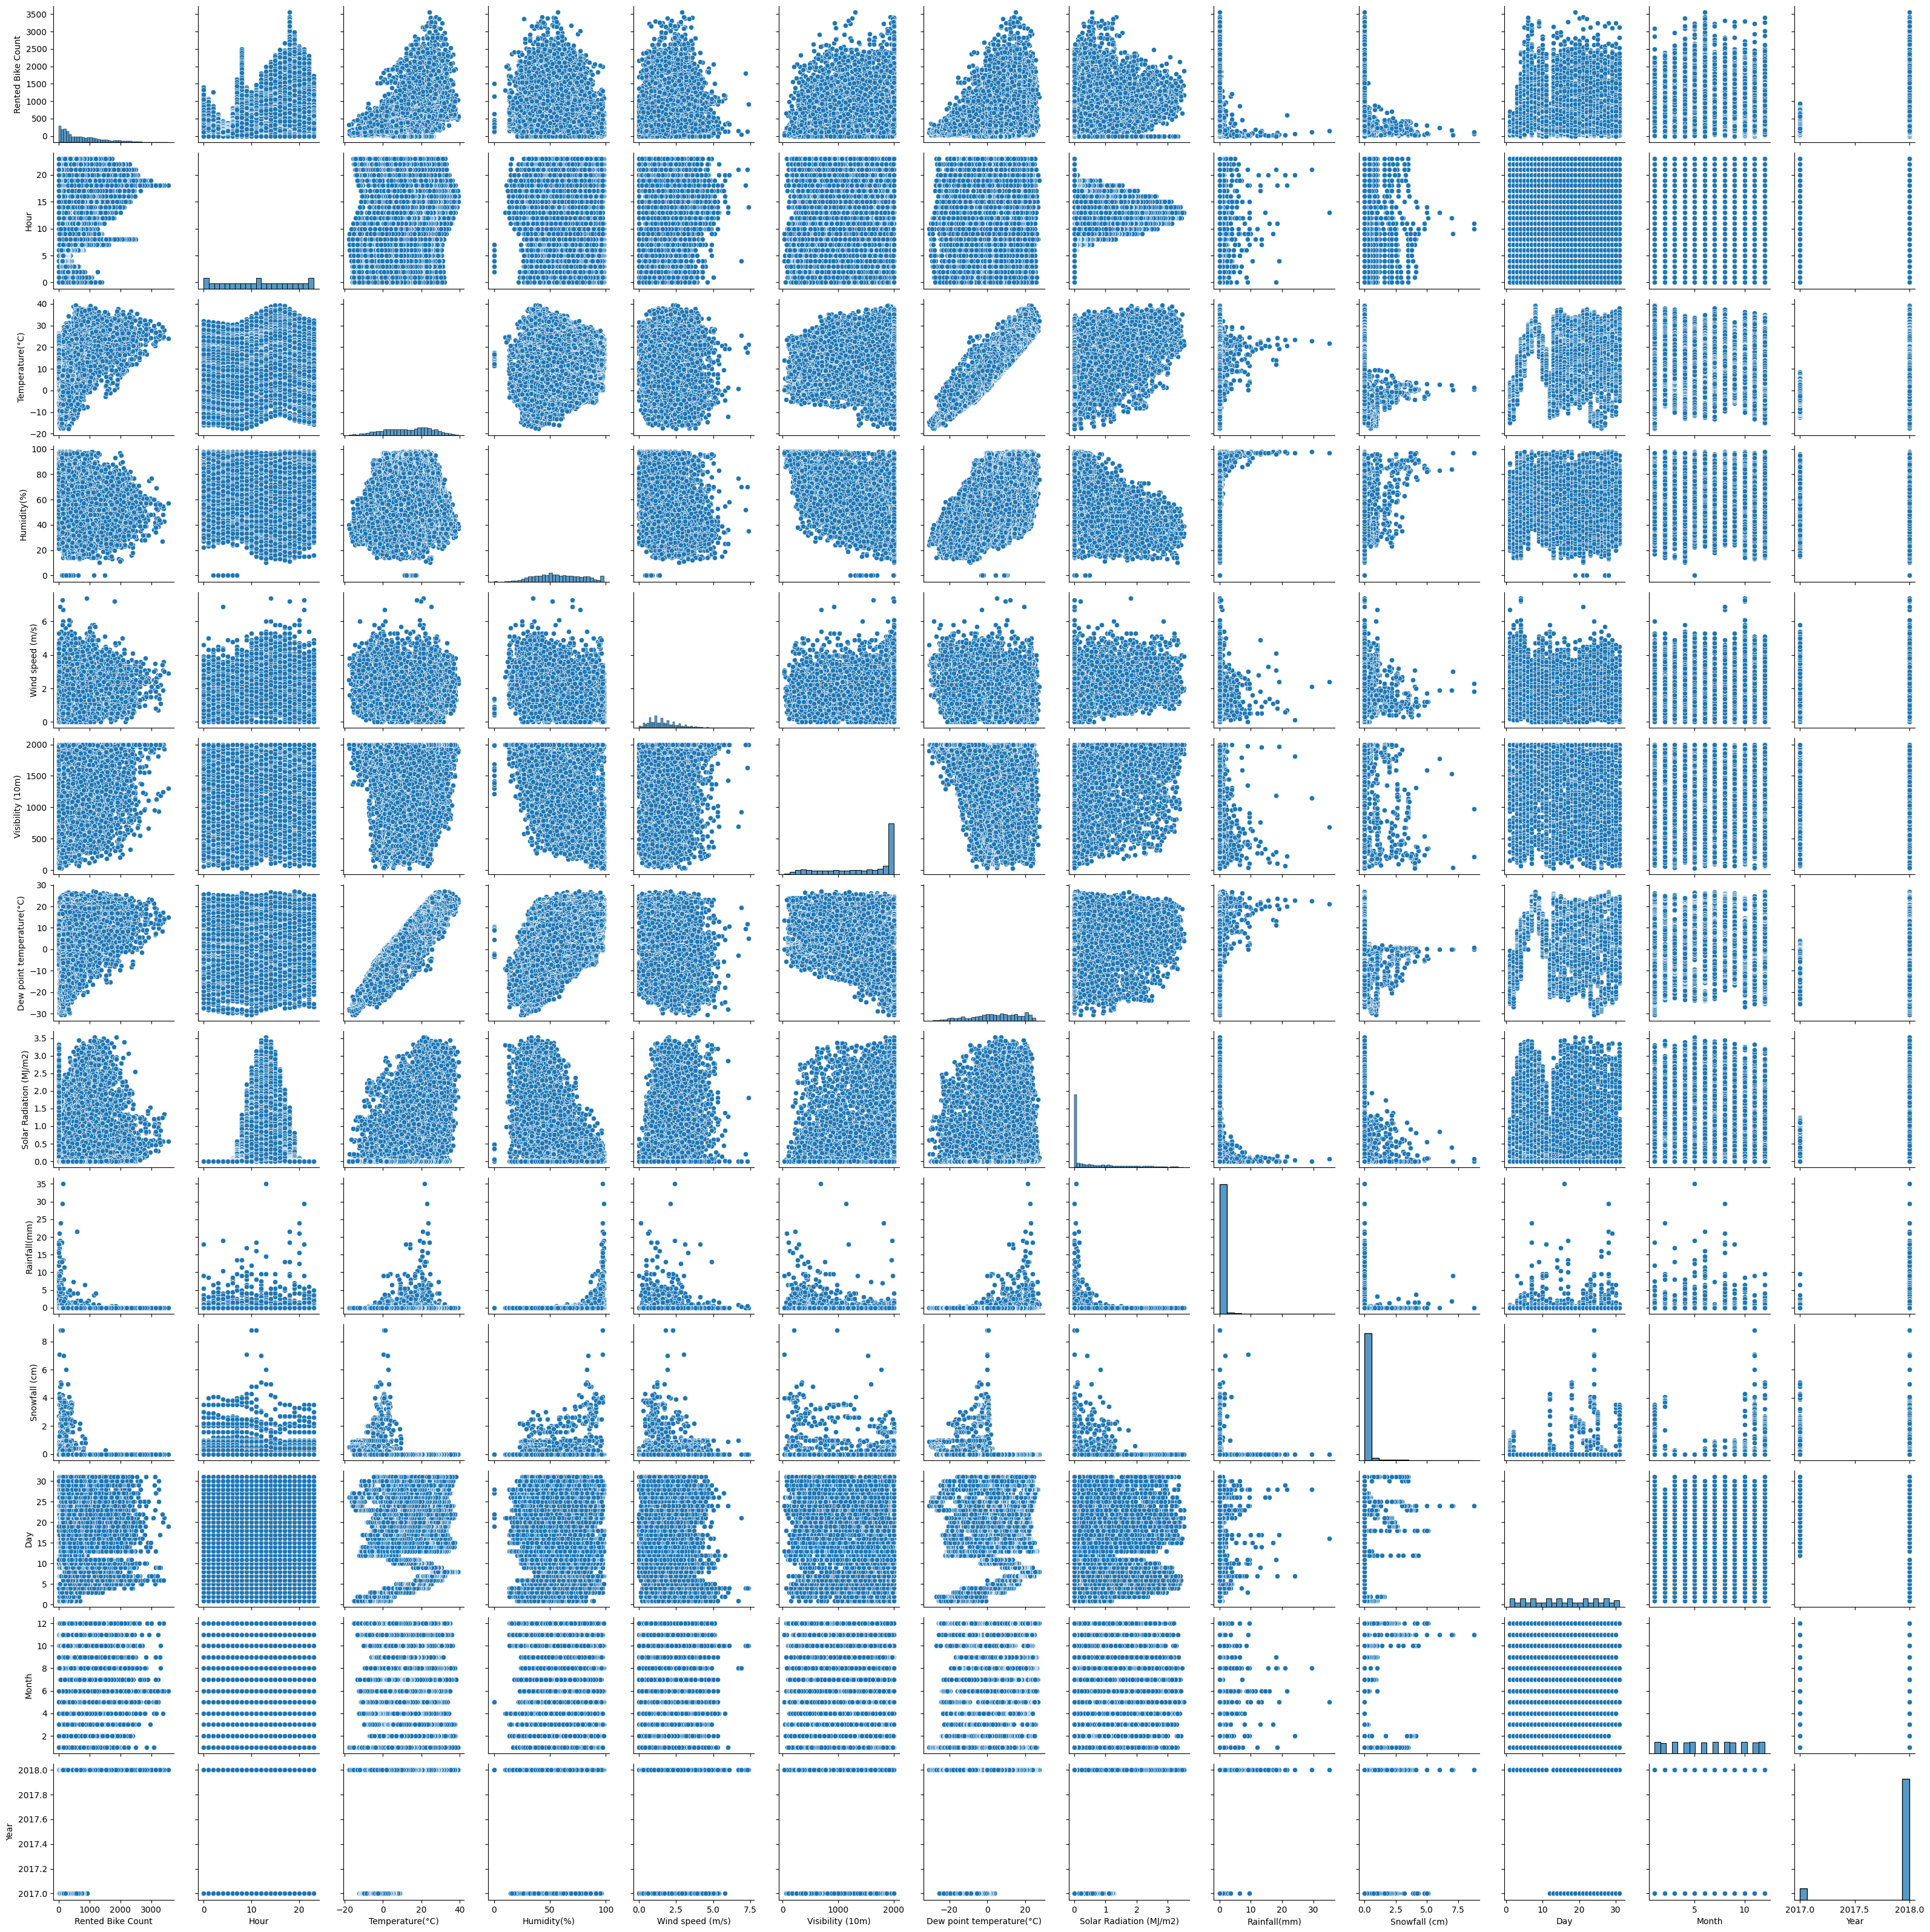

In [228]:
sns.pairplot(df)

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

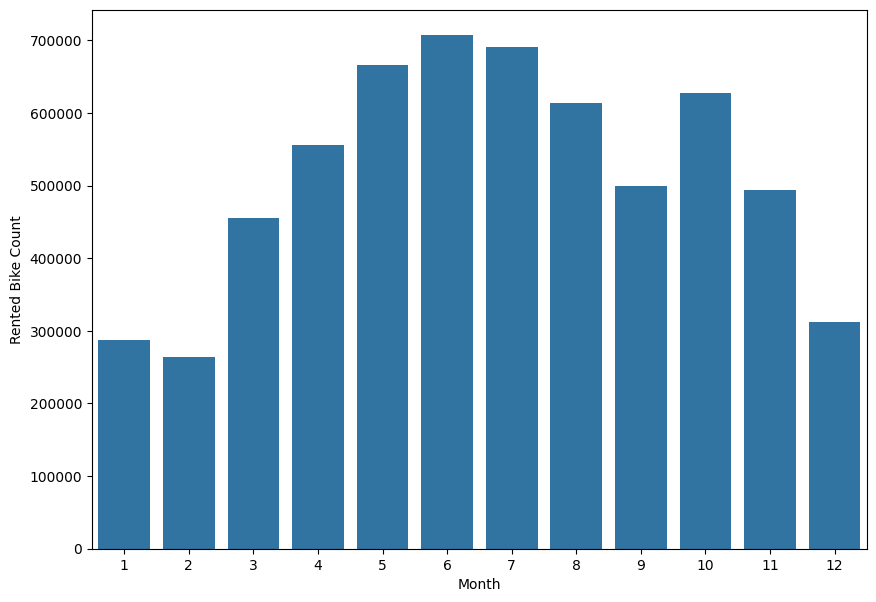

In [229]:
plt.figure(figsize=(10,7))
Month = df.groupby("Month").sum().reset_index()
sns.barplot(x="Month", y="Rented Bike Count", data=Month)

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

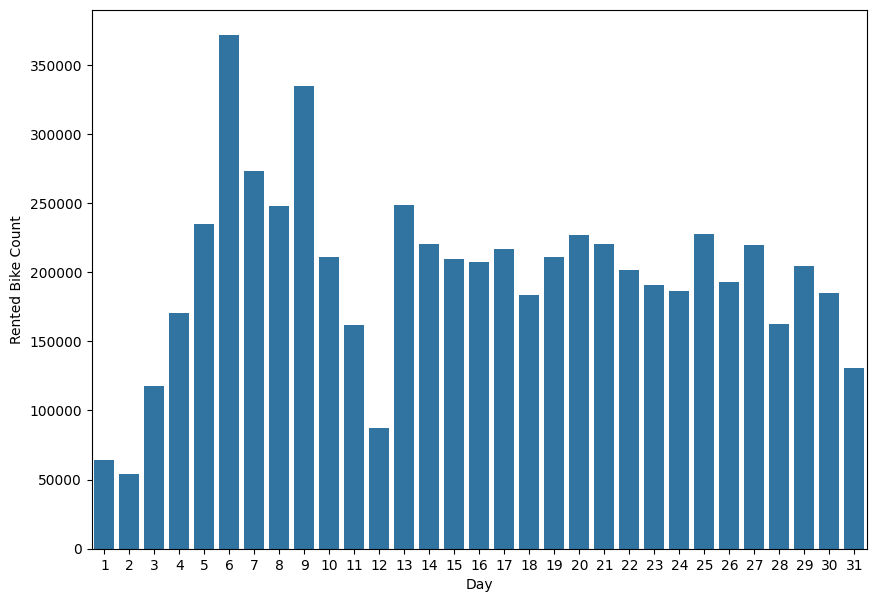

In [230]:
plt.figure(figsize=(10,7))
Month = df.groupby("Day").sum().reset_index()
sns.barplot(x="Day", y="Rented Bike Count", data=Month)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

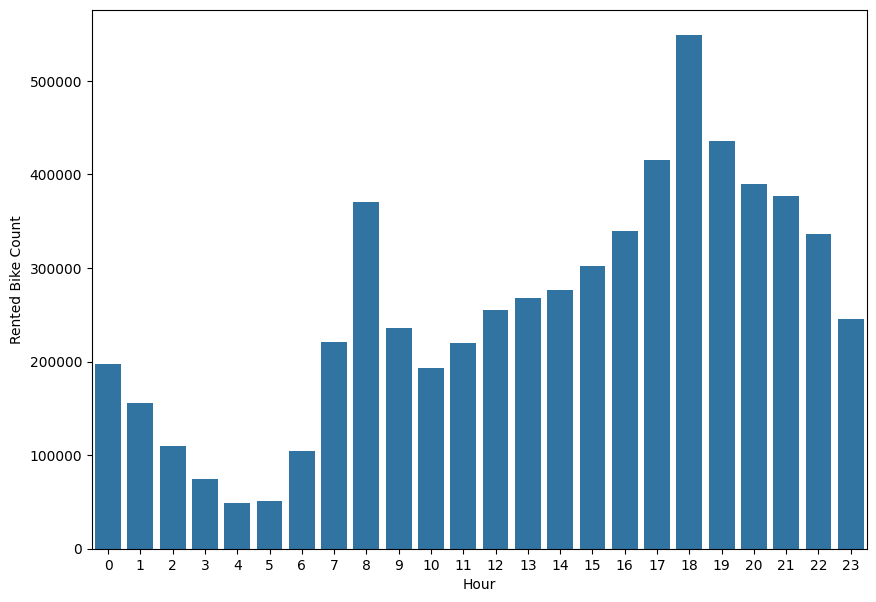

In [231]:
plt.figure(figsize=(10,7))
Hour = df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour", y="Rented Bike Count", data=Hour)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

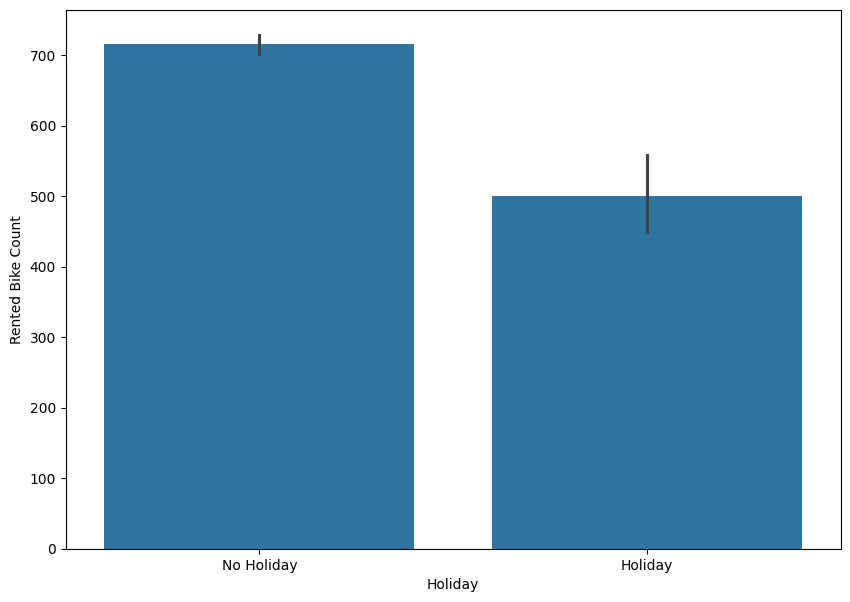

In [232]:
plt.figure(figsize=(10,7))
sns.barplot(x="Holiday", y="Rented Bike Count", data=df)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

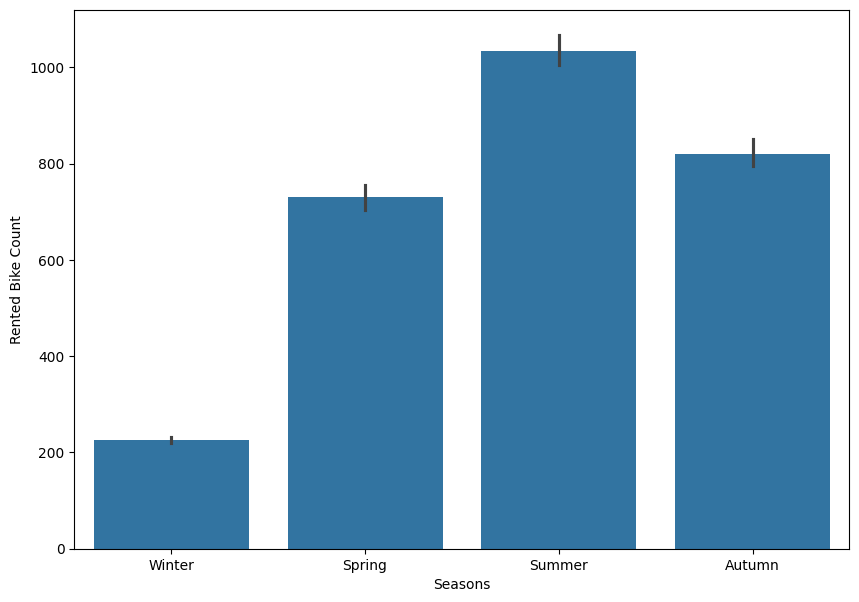

In [233]:
plt.figure(figsize=(10,7))
sns.barplot(x="Seasons", y="Rented Bike Count", data=df)

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

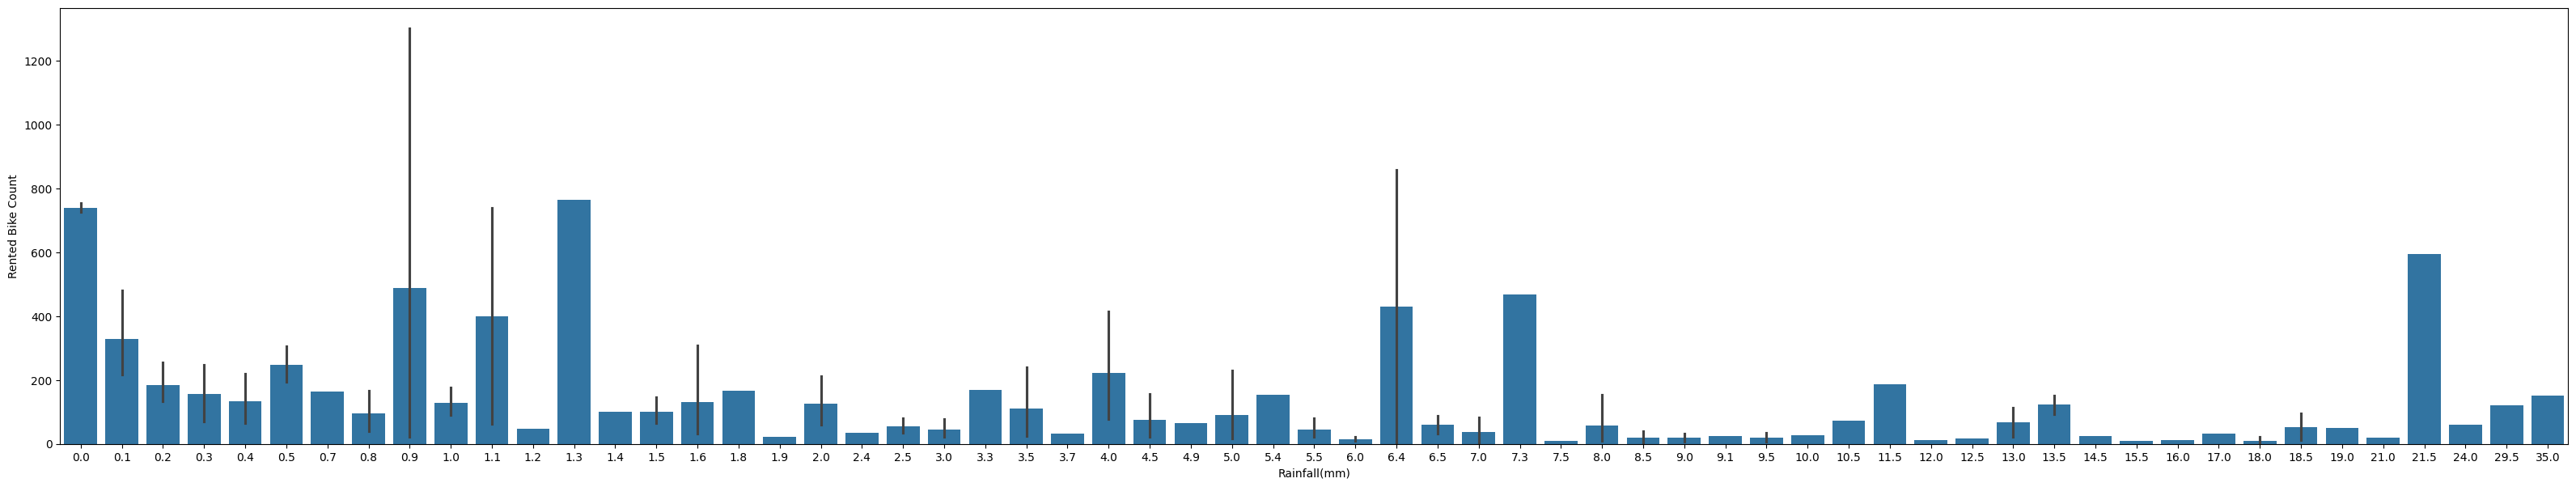

In [234]:
plt.figure(figsize=(40,7))
sns.barplot(x="Rainfall(mm)", y="Rented Bike Count", data=df)

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

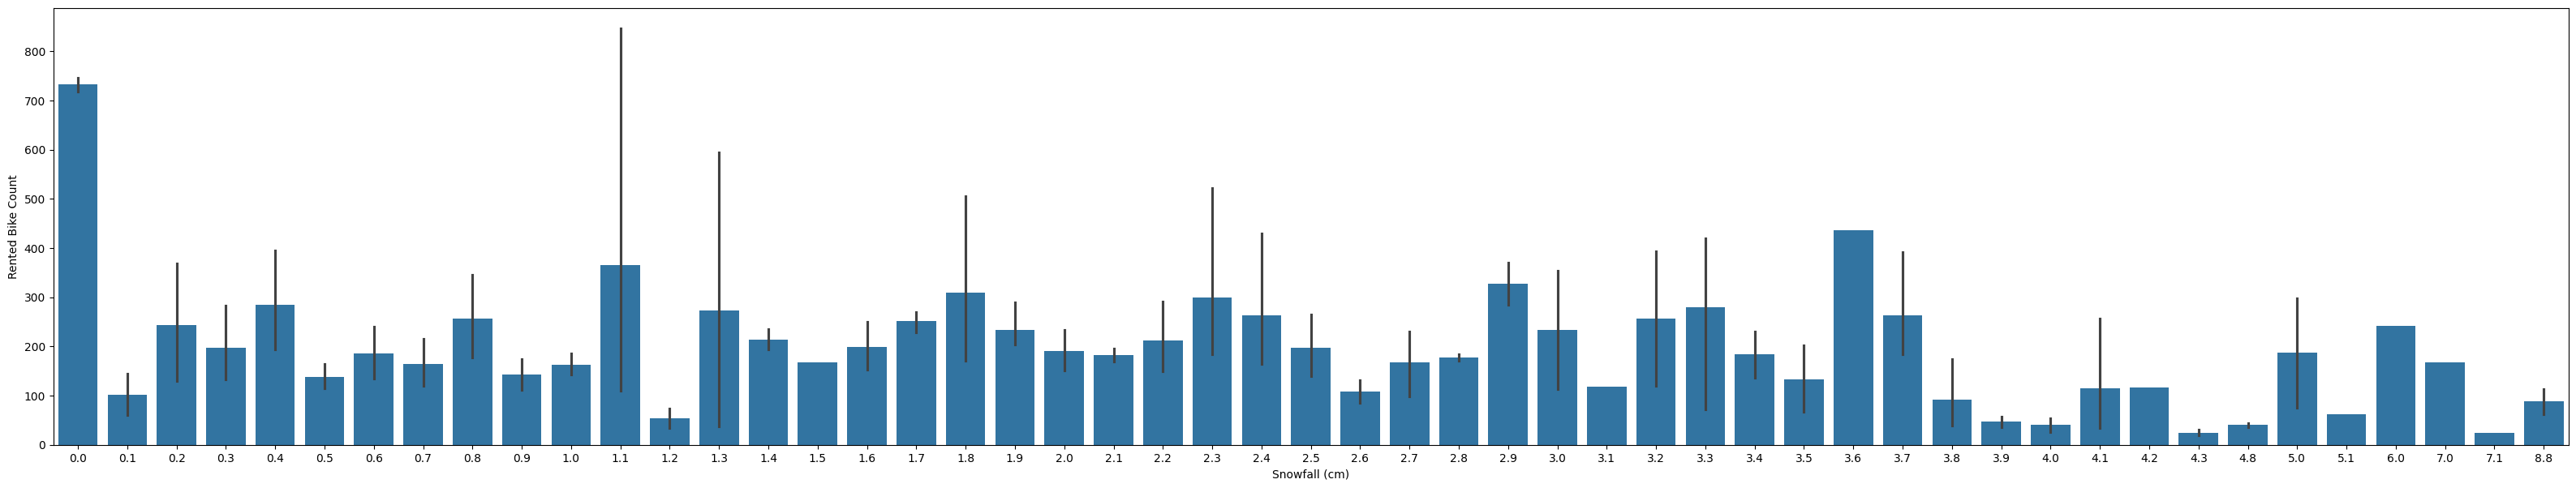

In [235]:
plt.figure(figsize=(40,7))
sns.barplot(x="Snowfall (cm)", y="Rented Bike Count", data=df)

<Figure size 4000x700 with 0 Axes>

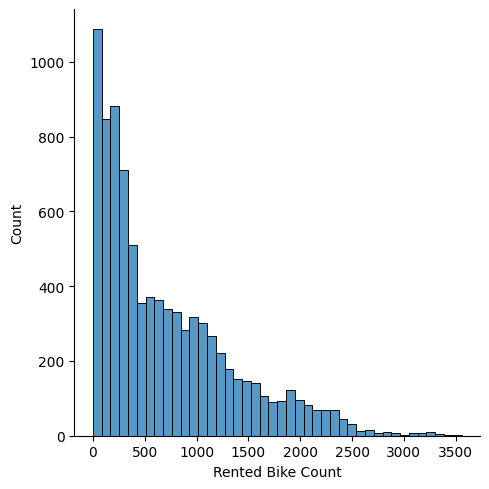

In [236]:
plt.figure(figsize=(40,7))
sns.displot(df["Rented Bike Count"])
# positively skewed 0-500-1000 are bins. Indicates how many counts are there for rented bike in datasets

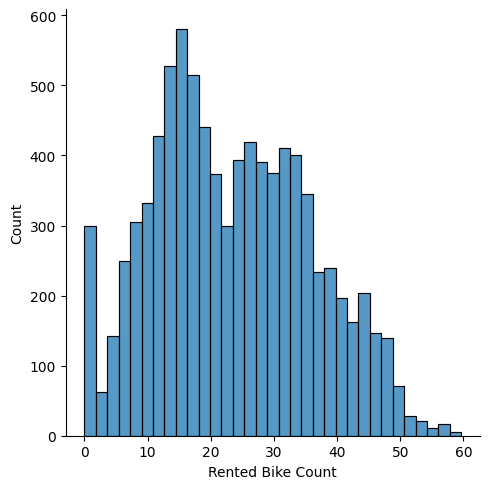

In [237]:
sns.displot(np.sqrt(df["Rented Bike Count"]))#sqrt is used to reduce skewness if data is highly skewed.stabize variance.make data normal.improved data distribution for visualization .

In [238]:
#df.info()
#df["Seasons"].dtype
#df["Seasons"] = pd.to_numeric(df["Seasons"]) 

## Skewed Data

In [245]:
'''df["Holiday"] = df["Holiday"].map({"No Holiday":0, "Holiday":1})
df["Functioning Day"] = df["Functioning Day"].map({"No":0, "Yes":1})
df_season = pd.get_dummies(df["Seasons"], drop_first = True)
df_weekday = pd.get_dummies(df["weekday"], drop_first = True)
df.info()
#df=df.select_dtypes(include=['int64','float64'])'''
num_col=['Visibility (10m)','Dew point temperature(°C)','Temperature(°C)','Month','Hour','Day','Humidity(%)','Wind speed (m/s)','Rented Bike Count','Solar Radiation (MJ/m2)','Snowfall (cm)','Rainfall(mm)']
df[num_col].skew().sort_values(ascending=True) # it works on numeric value only

Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  weekday                    8760 non-null   objec

## Remove Multicollinearity

In [247]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")# +1 to -1, if one inc other also inc (+), -ve means decrease with other 

ValueError: could not convert string to float: 'Winter'

<Figure size 1000x1000 with 0 Axes>

In [248]:
df.values

array([[254, 0, -5.2, ..., 12, 1, 2017],
       [204, 1, -5.5, ..., 12, 1, 2017],
       [173, 2, -6.0, ..., 12, 1, 2017],
       ...,
       [694, 21, 2.6, ..., 30, 11, 2018],
       [712, 22, 2.1, ..., 30, 11, 2018],
       [584, 23, 1.9, ..., 30, 11, 2018]], shape=(8760, 17), dtype=object)

In [249]:
def get_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [ variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif

In [250]:
not_for_vif = [ "Day", "Month", "Year", "Rented Bike Count"] 

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variables        VIF
0                       Hour   4.418242
1            Temperature(°C)  33.385256
2                Humidity(%)   5.371996
3           Wind speed (m/s)   4.805364
4           Visibility (10m)   9.085977
5  Dew point temperature(°C)  17.126199
6    Solar Radiation (MJ/m2)   2.881590
7               Rainfall(mm)   1.081567
8              Snowfall (cm)   1.120833

In [251]:
not_for_vif = [ "Day", "Month", "Year", "Rented Bike Count", "Dew point temperature(°C)"] 

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variables       VIF
0                     Hour  3.921832
1          Temperature(°C)  3.228318
2              Humidity(%)  4.868221
3         Wind speed (m/s)  4.608625
4         Visibility (10m)  4.710170
5  Solar Radiation (MJ/m2)  2.246791
6             Rainfall(mm)  1.079158
7            Snowfall (cm)  1.120579

In [252]:
df.drop(["Dew point temperature(°C)"], axis=1, inplace=True)

## Encoding

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [254]:
cat_features = ["Seasons", "Holiday", "Functioning Day", "weekday"]

In [256]:
df["Holiday"].value_counts()
df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 2000                      0.0           0.0            0.0   
1                 2000                      0.0           0.0            0.0   
2                 2000                      0.0           0.0            0.0   
3                 2000                      0.0           0.0            0.0   
4                 2000                      0.0           0.0            0.0   
...                ...                      ...           ...            ...   
8755              1894                      0.0           0.0            0.0   
8756              2000                      0.0           0.0            0.0   
8757              1968                      0.0           0.0            0.0   
8758              1859                      0.0           0.0            0.0   
8759              1909                      0.0           0.0            0.0   

     Seasons     Holiday Functioning Day   weekday  Day  Month  Year  
0     Winter  No Holiday             Yes  Thursday   12      1  2017  
1     Winter  No Holiday             Yes  Thursday   12      1  2017  
2     Winter  No Holiday             Yes  Thursday   12      1  2017  
3     Winter  No Holiday             Yes  Thursday   12      1  2017  
4     Winter  No Holiday             Yes  Thursday   12      1  2017  
...      ...         ...             ...       ...  ...    ...   ...  
8755  Autumn  No Holiday             Yes    Friday   30     11  2018  
8756  Autumn  No Holiday             Yes    Friday   30     11  2018  
8757  Autumn  No Holiday             Yes    Friday   30     11  2018  
8758  Autumn  No Holiday             Yes    Friday   30     11  2018  
8759  Autumn  No Holiday             Yes    Friday   30     11  2018  

[8760 rows x 16 columns]

In [257]:
df["Functioning Day"].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [258]:
df["Seasons"].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [259]:
df["weekday"].value_counts()

weekday
Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: count, dtype: int64

In [260]:
df["Holiday"] = df["Holiday"].map({"No Holiday":0, "Holiday":1})
df["Functioning Day"] = df["Functioning Day"].map({"No":0, "Yes":1})
df


Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 2000                      0.0           0.0            0.0   
1                 2000                      0.0           0.0            0.0   
2                 2000                      0.0           0.0            0.0   
3                 2000                      0.0           0.0            0.0   
4                 2000                      0.0           0.0            0.0   
...                ...                      ...           ...            ...   
8755              1894                      0.0           0.0            0.0   
8756              2000                      0.0           0.0            0.0   
8757              1968                      0.0           0.0            0.0   
8758              1859                      0.0           0.0            0.0   
8759              1909                      0.0           0.0            0.0   

     Seasons  Holiday  Functioning Day   weekday  Day  Month  Year  
0     Winter        0                1  Thursday   12      1  2017  
1     Winter        0                1  Thursday   12      1  2017  
2     Winter        0                1  Thursday   12      1  2017  
3     Winter        0                1  Thursday   12      1  2017  
4     Winter        0                1  Thursday   12      1  2017  
...      ...      ...              ...       ...  ...    ...   ...  
8755  Autumn        0                1    Friday   30     11  2018  
8756  Autumn        0                1    Friday   30     11  2018  
8757  Autumn        0                1    Friday   30     11  2018  
8758  Autumn        0                1    Friday   30     11  2018  
8759  Autumn        0                1    Friday   30     11  2018  

[8760 rows x 16 columns]

In [261]:
df_season = pd.get_dummies(df["Seasons"], drop_first = True)
df_weekday = pd.get_dummies(df["weekday"], drop_first = True)
df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 2000                      0.0           0.0            0.0   
1                 2000                      0.0           0.0            0.0   
2                 2000                      0.0           0.0            0.0   
3                 2000                      0.0           0.0            0.0   
4                 2000                      0.0           0.0            0.0   
...                ...                      ...           ...            ...   
8755              1894                      0.0           0.0            0.0   
8756              2000                      0.0           0.0            0.0   
8757              1968                      0.0           0.0            0.0   
8758              1859                      0.0           0.0            0.0   
8759              1909                      0.0           0.0            0.0   

     Seasons  Holiday  Functioning Day   weekday  Day  Month  Year  
0     Winter        0                1  Thursday   12      1  2017  
1     Winter        0                1  Thursday   12      1  2017  
2     Winter        0                1  Thursday   12      1  2017  
3     Winter        0                1  Thursday   12      1  2017  
4     Winter        0                1  Thursday   12      1  2017  
...      ...      ...              ...       ...  ...    ...   ...  
8755  Autumn        0                1    Friday   30     11  2018  
8756  Autumn        0                1    Friday   30     11  2018  
8757  Autumn        0                1    Friday   30     11  2018  
8758  Autumn        0                1    Friday   30     11  2018  
8759  Autumn        0                1    Friday   30     11  2018  

[8760 rows x 16 columns]

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [263]:
df = pd.concat([df, df_season, df_weekday], axis=1)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [265]:
df.drop(["Seasons", "weekday"], axis=1, inplace=True)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int32  
 12  Month                    8760 non-null   int32  
 13  Year                     8760 non-null   int32  
 14  Spring                  

In [267]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  ...  Year  Spring  Summer  Winter  Monday  Saturday  Sunday  \
0        0  ...  2017   False   False    True   False     False   False   
1        0  ...  2017   False   False    True   False     False   False   
2        0  ...  2017   False   False    True   False     False   False   
3        0  ...  2017   False   False    True   False     False   False   
4        0  ...  2017   False   False    True   False     False   False   

   Thursday  Tuesday  Wednesday  
0      True    False      False  
1      True    False      False  
2      True    False      False  
3      True    False      False  
4      True    False      False  

[5 rows x 23 columns]

In [269]:
#df.columns
df[['Spring','Summer','Winter','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']]=df[['Spring','Summer','Winter','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']].astype(int)

In [270]:
df.shape

(8760, 23)

In [271]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day',
       'Month', 'Year', 'Spring', 'Summer', 'Winter', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

## Split Data for Training & Tesing

In [272]:
X = df.drop("Rented Bike Count", axis=1)
y = df["Rented Bike Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (7008, 22)
Shape of y_train :  (7008,)
Shape of X_test :  (1752, 22)
Shape of y_test :  (1752,)


## Scaling

In [273]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[:2]

array([[ 1.51118219,  0.05556521, -2.10940521,  0.46658045,  0.92262892,
        -0.65681529, -0.12916836, -0.17535463,         nan,         nan,
        -1.32928272,  1.58736786,  0.30459857,  1.74132735, -0.58152447,
        -0.57866842, -0.39840954, -0.40773843, -0.41815465, -0.40773843,
         2.4655198 , -0.41815465],
       [ 0.93371229,  1.00382241, -0.25185689,  1.82005277,  0.92262892,
         0.82386154, -0.12916836, -0.17535463,         nan,         nan,
        -1.10164234,  1.58736786,  0.30459857, -0.57427456,  1.71961809,
        -0.57866842, -0.39840954, -0.40773843, -0.41815465,  2.45255275,
        -0.40559398, -0.41815465]])

In [274]:
sc.mean_

array([1.15323916e+01, 1.28319920e+01, 5.81522546e+01, 1.71738014e+00,
       1.44041795e+03, 5.67796804e-01, 1.52539954e-01, 7.52283105e-02,
       4.92294521e-02, 9.67751142e-01, 1.56787957e+01, 6.51341324e+00,
       2.01791510e+03, 2.48002283e-01, 2.52711187e-01, 2.50856164e-01,
       1.36986301e-01, 1.42551370e-01, 1.48829909e-01, 1.42551370e-01,
       1.41267123e-01, 1.48829909e-01])

In [275]:
sc.scale_

array([6.92676802e+00, 1.20220548e+01, 2.04570722e+01, 1.03437653e+00,
       6.06508248e+02, 8.64469525e-01, 1.18093896e+00, 4.29006703e-01,
       2.16346743e-01, 1.76660323e-01, 8.78578762e+00, 3.45640534e+00,
       2.78737249e-01, 4.31853159e-01, 4.34566730e-01, 4.33505881e-01,
       3.43832888e-01, 3.49614755e-01, 3.55920731e-01, 3.49614755e-01,
       3.48296889e-01, 3.55920731e-01])

# Training ML Model

## Linear Regression Model

In [276]:
from sklearn.linear_model import LinearRegression

In [277]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [278]:
y_pred = lr.predict(X_test)

In [279]:
y_pred

array([  82.875826  ,  976.47642256, 1409.37670678, ..., 1544.96839026,
        504.51433769,  803.78036478], shape=(1752,))

# Model Evaluation

In [280]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [281]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

MSE : 188944.76470240724
RMSE : 434.67777111603857
MAE : 330.9044419713851
R2 : 0.5371041582058085


In [282]:
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} : ['MSE': {round(MSE,3)}, 'RMSE':{round(RMSE,3)}, 'MAE' :{round(MAE,3)}, 'R2':{round(R2,3)}]")

In [283]:
get_metrics(y_test, y_pred, "LinearRegression")

LinearRegression : ['MSE': 188944.765, 'RMSE':434.678, 'MAE' :330.904, 'R2':0.537]


## Train Multiple Models

In [ ]:
#!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [285]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [286]:
rir = Ridge().fit(X_train, y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train, y_train)
y_pred_lar = lar.predict(X_test)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_r = LinearRegression().fit(X_train_poly, y_train)
y_pred_poly = poly_r.predict(X_test_poly)

svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

knnr = KNeighborsRegressor().fit(X_train, y_train)
y_pred_knnr = knnr.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

In [287]:
get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_poly, "PolynomialFeatures")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_knnr, "KNNR")
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_xgbr, "XGBRegressor")

Ridge : ['MSE': 188944.168, 'RMSE':434.677, 'MAE' :330.898, 'R2':0.537]
Lasso : ['MSE': 188895.35, 'RMSE':434.621, 'MAE' :330.551, 'R2':0.537]
PolynomialFeatures : ['MSE': 125305.742, 'RMSE':353.986, 'MAE' :248.196, 'R2':0.693]
SVR : ['MSE': 318011.649, 'RMSE':563.925, 'MAE' :386.276, 'R2':0.221]
KNNR : ['MSE': 102739.999, 'RMSE':320.531, 'MAE' :210.222, 'R2':0.748]
DecisionTreeRegressor : ['MSE': 88407.112, 'RMSE':297.333, 'MAE' :167.049, 'R2':0.783]
RandomForestRegressor : ['MSE': 39874.776, 'RMSE':199.687, 'MAE' :120.259, 'R2':0.902]
XGBRegressor : ['MSE': 33114.133, 'RMSE':181.973, 'MAE' :113.528, 'R2':0.919]


## Visualise Model Prediction

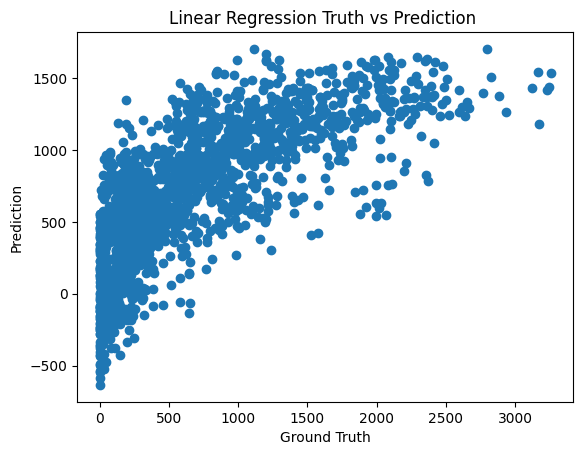

In [288]:
plt.scatter(y_test, y_pred)
plt.title("Linear Regression Truth vs Prediction ")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

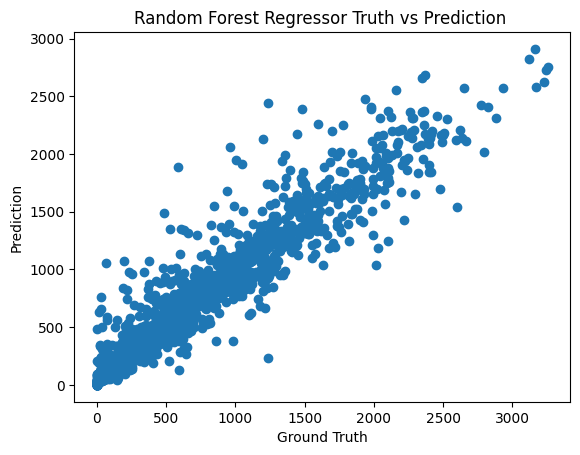

In [289]:
plt.scatter(y_test, y_pred_rfr)
plt.title("Random Forest Regressor Truth vs Prediction ")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

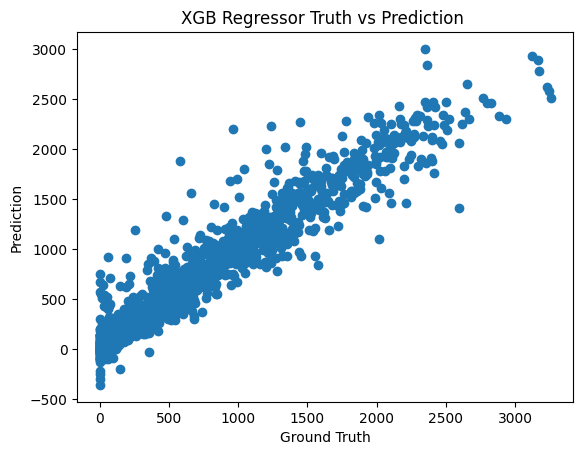

In [290]:
plt.scatter(y_test, y_pred_xgbr)
plt.title("XGB Regressor Truth vs Prediction ")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

## Hyperparameter Tuning for Random Forest Regressor

In [291]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [292]:
import time 
start_time = time.time()

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
y_pred_rf_random = rf_random.predict(X_test)

print("Time taken to training using randomize search : ", time.time()-start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Py

Time taken to training using randomize search :  1125.9740781784058


In [293]:
get_metrics(y_test, y_pred_rf_random, "RandomForestRegressor Fine Tuning")

RandomForestRegressor Fine Tuning : ['MSE': 36954.841, 'RMSE':192.236, 'MAE' :121.562, 'R2':0.909]


In [294]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'bootstrap': False}

In [295]:
rf_tuned= RandomForestRegressor(n_estimators=400,
                               min_samples_split=2,
                               min_samples_leaf=1,
                                max_features="sqrt",
                                max_depth=120,
                                bootstrap=False)
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

get_metrics(y_test, y_pred_rf_tuned, "RandomForestRegressor With Best Parameters")

RandomForestRegressor With Best Parameters : ['MSE': 37478.989, 'RMSE':193.595, 'MAE' :122.447, 'R2':0.908]


## Hyperparameter Tuning for XGBoost Regressor# 

In [296]:
from sklearn.model_selection import RandomizedSearchCV

import time 
start_time = time.time()

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}


xgbr = XGBRegressor(seed = 20)
rscv = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                          cv=5,
                         verbose=1)

rscv.fit(X_train, y_train)

y_pred_xgb_random = rscv.predict(X_test)

get_metrics(y_test, y_pred_xgb_random, "XGBRegressor With Best Parameters")

print("Time taken to training using randomize search : ", time.time()-start_time)

print("Best parameters:", rscv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGBRegressor With Best Parameters : ['MSE': 32370.73, 'RMSE':179.919, 'MAE' :109.745, 'R2':0.921]
Time taken to training using randomize search :  938.3747627735138
Best parameters: {'subsample': np.float64(0.7), 'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.01, 'colsample_bytree': np.float64(0.7999999999999999), 'colsample_bylevel': np.float64(0.6)}


In [297]:
xgbr = XGBRegressor(subsample=0.6,
                   n_estimators=1000,
                   max_depth=6,
                   learning_rate=0.1,
                   colsample_bytree=0.7,
                   colsample_bylevel=0.4,
                   seed = 20)

xgbr.fit(X_train, y_train)

y_pred_tuned = xgbr.predict(X_test)

get_metrics(y_test, y_pred_tuned, "XGBRegressor With Best Parameters")

XGBRegressor With Best Parameters : ['MSE': 29214.938, 'RMSE':170.924, 'MAE' :106.381, 'R2':0.928]


In [298]:
xgbr = XGBRegressor(subsample=0.6,
                   n_estimators=1000,
                   max_depth=6,
                   learning_rate=0.09,
                   colsample_bytree=0.7,
                   colsample_bylevel=0.4,
                   seed = 20)

xgbr.fit(X_train, y_train)

y_pred_tuned = xgbr.predict(X_test)

get_metrics(y_test, y_pred_tuned, "XGBRegressor With Best Parameters")

XGBRegressor With Best Parameters : ['MSE': 29335.338, 'RMSE':171.276, 'MAE' :106.171, 'R2':0.928]


## Save ML Best Model

In [299]:
import pickle
import os

dir = r"G:\python_all\Machine_learning_P1\001 RG Seoul-Bike-Sharing-Demand-Prediction\models"
model_file_name = "xgboost_regressor_r2_0_928_v1.pkl"

model_file_path = os.path.join(dir, model_file_name)

pickle.dump(xgbr, open(model_file_path, "wb"))

In [300]:
X_test[0,:]

array([ 1.07807977,  0.22192612,  0.77468297,  1.82005277, -1.26200749,
       -0.25194272, -0.12916836, -0.17535463, -0.22754885, -5.47803337,
       -1.21546253,  1.00873202,  0.30459857,  1.74132735, -0.58152447,
       -0.57866842, -0.39840954, -0.40773843, -0.41815465, -0.40773843,
       -0.40559398, -0.41815465])

In [301]:
X_test[1,:]

array([-0.65432992,  1.24504573,  0.23697162, -0.5001855 ,  0.56154562,
       -0.28664608, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        0.94712104,  0.14077827,  0.30459857, -0.57427456,  1.71961809,
       -0.57866842, -0.39840954, -0.40773843, -0.41815465, -0.40773843,
        2.4655198 , -0.41815465])

In [302]:
y_test

3859       0
5647    1213
6735    1391
374      292
5791    1130
        ... 
1992     195
930      316
5634    2405
3291     164
6416     721
Name: Rented Bike Count, Length: 1752, dtype: int64

## Dump Scaling Parameters

In [303]:
sc_dump_path = r"G:\python_all\Machine_learning_P1\001 RG Seoul-Bike-Sharing-Demand-Prediction\models\sc.pkl"

pickle.dump(sc, open(sc_dump_path, "wb"))

## Deployment

In [ ]:
df.head(1)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   

   Holiday  ...  Year  Spring  Summer  Winter  Monday  Saturday  Sunday  \
0        0  ...  2017       0       0       1       0         0       0   

   Thursday  Tuesday  Wednesday  
0         1        0          0  

[1 rows x 23 columns]

## Users Input Data

In [ ]:
date = "01/03/2023"
hour = 5
temperature_c = 0
humidity = 25
wind_speed = 5.2
visibility = 2
solar_radiation = 0.0
rainfall = 35
snowfall = 8
holiday = "Holiday"
functioning_day = "No"
seasons = "Winter" # ["Spring", "Summer", "Autumn", "Winter"]


# Convert users input to models consumable format

In [ ]:
holiday_dic = {"No Holiday":0, "Holiday":1}
functioning_day_dic = {"Yes":1, "No":0} 


In [ ]:
from datetime import datetime

def get_string_to_date_time(date):
    dt = datetime.strptime(date, '%d/%m/%Y')
    return {"Day": dt.day, "Month":dt.month, "Year":dt.year, "day_name":dt.strftime("%A")}

date_time = get_string_to_date_time(date)


In [ ]:
input_for_pred = [hour, temperature_c, humidity, wind_speed, visibility, solar_radiation, rainfall, snowfall, 
                  holiday_dic[holiday], functioning_day_dic[functioning_day], 
                  date_time["Day"], date_time["Month"], date_time["Year"],
                 ]

input_for_pred

[5, 0, 25, 5.2, 2, 0.0, 35, 8, 1, 0, 1, 3, 2023]

In [ ]:
input_cols = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
              'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day','Month', 'Year',]
                 
df_inputs = pd.DataFrame([input_for_pred], columns= input_cols)
df_inputs

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     5                0           25               5.2                 2   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                      0.0            35              8        1   

   Functioning Day  Day  Month  Year  
0                0    1      3  2023

## Users Date Processing

In [ ]:
u_day_name = "Monday" #date_time["day_name"]

cols_day = ['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
data = np.zeros((1,len(cols_day)), dtype=int)
df_days = pd.DataFrame(data, columns=cols_day)

if u_day_name in cols_day:
    df_days[u_day_name]= 1

df_days

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       1         0       0         0        0          0

## Users Season processing

In [ ]:
u_seasons = "Spring" #["Spring", "Summer", "Autumn", "Winter"]

cols_seasons = ['Spring', 'Summer', 'Winter']
data = np.zeros((1,len(cols_seasons)), dtype=int)
df_seasons = pd.DataFrame(data, columns=cols_seasons)

if u_seasons in cols_seasons:
    df_seasons[u_seasons]= 1

df_seasons

Spring  Summer  Winter
0       1       0       0

In [ ]:
df_pred = pd.concat([df_inputs, df_seasons, df_days], axis=1)
df_pred

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     5                0           25               5.2                 2   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                      0.0            35              8        1   

   Functioning Day  ...  Year  Spring  Summer  Winter  Monday  Saturday  \
0                0  ...  2023       1       0       0       1         0   

   Sunday  Thursday  Tuesday  Wednesday  
0       0         0        0          0  

[1 rows x 22 columns]

In [ ]:
u_input_pred = sc.transform(df_pred)
u_input_pred

array([[-0.94306487, -1.06737095, -1.6205767 ,  3.36687828, -2.3716379 ,
        -0.65681529, 29.50826513, 18.47237264,  4.39466079, -5.47803337,
        -1.67074328, -1.01649341, 18.24263884,  1.74132735, -0.58152447,
        -0.57866842,  2.50998008, -0.40773843, -0.41815465, -0.40773843,
        -0.40559398, -0.41815465]])

In [ ]:
xgbr.predict(u_input_pred)

array([2.1526399], dtype=float32)